<a href="https://colab.research.google.com/github/mkgreen/Fraud-Detection-DT-Ensemble/blob/main/Bagging_and_Boosting_Esemble_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Loading the Data**


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
data = pd.read_csv('/content/talking_data.csv')
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


# **Exploratory Data Analysis (EDA)**

In [3]:
df = data.copy()
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 100000 rows and 8 columns.


In [5]:
df.isnull().values.any()

True

In [6]:
miss_val = df.isna().sum()

print("Missing Value Count by Feature:")
print("-"*31)
print(miss_val)

miss_val_count = miss_val.sum()

if miss_val_count == 0:
  print()
  print("There are no missing values in the dataset.")
else:
  print()
  print(f"There are {miss_val_count} missing values in this dataset.")

Missing Value Count by Feature:
-------------------------------
ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

There are 99773 missing values in this dataset.


In [7]:
# # Dropping the column 'attributed_time', almost all values are NaN
# df.drop(['attributed_time'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [9]:
# converting click time to datetime
df['click_time'] = pd.to_datetime(df['click_time'])

In [10]:
counts = df.nunique()

print("Features ordered by no. of unique values:")
print("-"*35)
print("")
counts.sort_values(ascending=False)

Features ordered by no. of unique values:
-----------------------------------



click_time         80350
ip                 34857
attributed_time      227
app                  161
channel              161
os                   130
device               100
is_attributed          2
dtype: int64

Correlation between variables: 


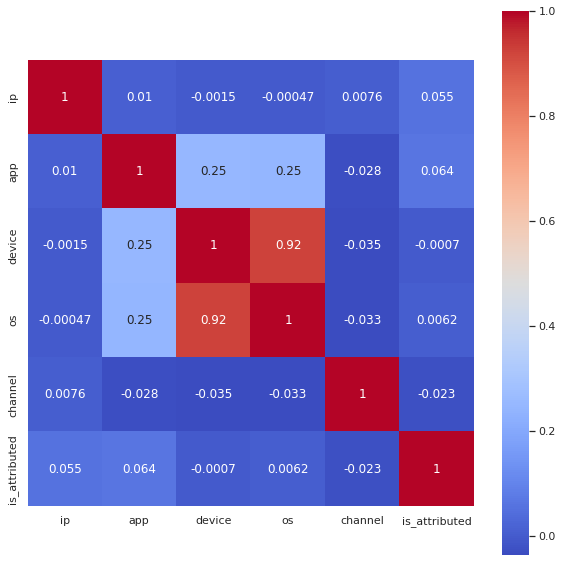

In [11]:
print("Correlation between variables: ")
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',square=True)

In [12]:
corr

,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


# **Removing the rare apps of less than 20% of clicks**

In [13]:
app_new = df.groupby('app').size().reset_index(name = 'count')
app_new = app_new[app_new['count']>app_new['count'].quantile(0.80)]
df1 = app_new.merge(df, on = 'app', how = 'inner')
df1.head()

,app,count,ip,device,os,channel,click_time,attributed_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,NaN,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,NaN,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,NaN,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,NaN,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,NaN,0


In [14]:
print("before cleaning 'app' data:")
print("-"*27)
print(df.nunique())
print()
print("after cleaning 'app' data:")
print("-"*27)
print(df1.nunique())

before cleaning 'app' data:
---------------------------
app                   32
count                 32
ip                 34641
device                83
os                   125
channel              144
click_time         79704
attributed_time      152
is_attributed          2
dtype: int64

after cleaning 'app' data:
---------------------------
ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      227
is_attributed          2
dtype: int64


# **Plotting 'App'**

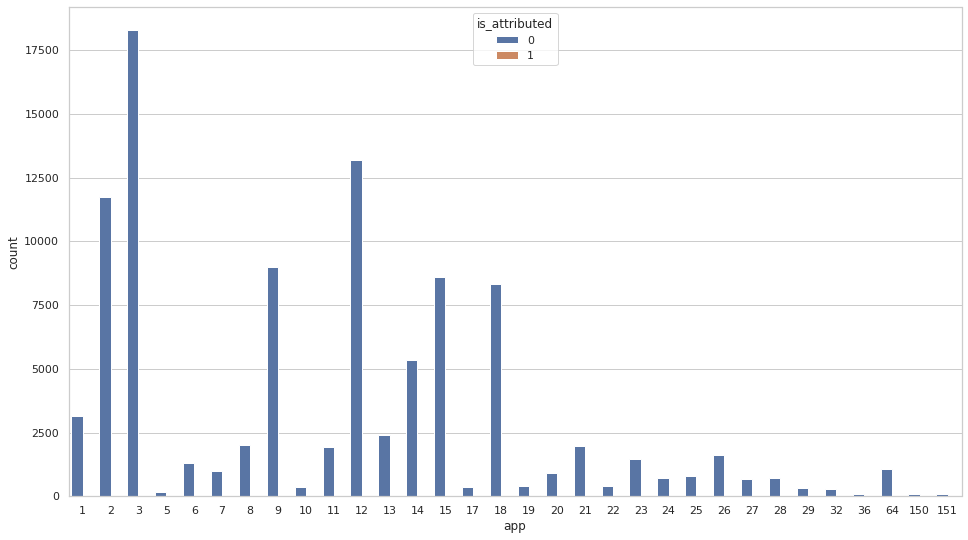

In [15]:
plt.figure(figsize=(16,9))
sns.countplot(x='app',hue='is_attributed',data=df1)
plt.show()

# **Using Pandas to derive new colomns such as:**
- **'day_of_week'**
- **'day_of_year'**
- **'month'**
- **and 'hour'**

In [16]:
df1['day_of_week']=df1['click_time'].dt.day_of_week
df1['day_of_year']=df1['click_time'].dt.day_of_year
df1['month']=df1['click_time'].dt.month
df1['hour']=df1['click_time'].dt.hour

df1.head()

,app,count,ip,device,os,channel,click_time,attributed_time,is_attributed,day_of_week,day_of_year,month,hour
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,NaN,0,3,313,11,1
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,NaN,0,1,311,11,17
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,NaN,0,1,311,11,9
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,NaN,0,3,313,11,14
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,NaN,0,1,311,11,15


In [17]:
df1 = df1.drop(['click_time','attributed_time'], axis=1)

In [39]:
print(f"Dimensions of dataset: {df1.shape}")
print()

print("Are there missing values in the dataset?")
print("-"*40)
if df1.isnull().values.any() == True:
  print(f"There are {df1.isna().sum()} missing values.")
else:
  print("There are no missing values.")
  # print("Are there any missing values in the dataset?")

Dimensions of dataset: (98977, 11)

Are there missing values in the dataset?
----------------------------------------
There are no missing values.


In [40]:
df1.dtypes

app              int64
count            int64
ip               int64
device           int64
os               int64
channel          int64
is_attributed    int64
day_of_week      int64
day_of_year      int64
month            int64
hour             int64
dtype: object

# **Data Balancing**

In [20]:
X = df1.drop(['is_attributed'],axis=1)
y = df1['is_attributed']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


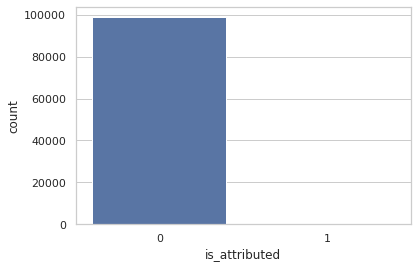

In [21]:
#smote
sns.countplot(y)
plt.show()

In [22]:
y.value_counts()

0    98825
1      152
Name: is_attributed, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X,y)
print(y_sm.value_counts())

0    98825
1    98825
Name: is_attributed, dtype: int64


# **Dividing data into Training and Testing subsets**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=10)

In [25]:
print('Dimension of train_x dataframe:',X_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)
print('Dimension of val_x dataframe:',X_test.shape)
print('Dimension of val_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (158120, 10)
Dimension of train_y dataframe: (158120,)
Dimension of val_x dataframe: (39530, 10)
Dimension of val_y dataframe: (39530,)


In [26]:
#Checking the avg download rates, should be comparable
print(np.average(y_train))
print(np.average(y_test))

0.500411080192259
0.4983556792309638


#**Applying XGBoost Classifier**

In [27]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbl=XGBClassifier()
xgbl.fit(X_train,y_train)
test_pred=xgbl.predict(X_test)
xgbl_score=xgbl.score(X_test,y_test)
y_pred=xgbl.predict_proba(X_test)

In [28]:
y_pred[:10]

array([[0.02318102, 0.976819  ],
       [0.03998798, 0.960012  ],
       [0.97770965, 0.02229037],
       [0.97285503, 0.02714495],
       [0.86316675, 0.13683325],
       [0.00650626, 0.99349374],
       [0.00469887, 0.9953011 ],
       [0.9795066 , 0.0204934 ],
       [0.84741426, 0.15258573],
       [0.9861611 , 0.01383887]], dtype=float32)

In [29]:
xgbl_score

0.9721983303819883

In [30]:
print(metrics.confusion_matrix(y_test,test_pred))

[[19490   340]
 [  759 18941]]


#**AdaBoost Boosting Classifier**

In [31]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print()
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print()
print("Confusion matrix of Adaboost Ensemble model:")
print(metrics.confusion_matrix(y_test,test_pred))


The Adaboost Ensemble model accuracy is 0.9460662787756134

Confusion matrix of Adaboost Ensemble model:
[[19302   528]
 [ 1604 18096]]


# **Performing Bagging Classifier**

In [32]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=30, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print()
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print()
print("The confusion matrix for the Bagging classifier model:")
print(metrics.confusion_matrix(y_test,test_pred))


The Bagging classifier model accuracy is 0.9983303819883632

The confusion matrix for the Bagging classifier model:
[[19784    46]
 [   20 19680]]


# **Bagging and Boosting model Comparison**

In [33]:
#print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}%".format(abcl_score*100))
print("The Bagging classifier model accuracy is {}%".format(bgcl_score*100))

The Adaboost Ensemble model accuracy is 94.60662787756135%
The Bagging classifier model accuracy is 99.83303819883632%


In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19830
           1       1.00      1.00      1.00     19700

    accuracy                           1.00     39530
   macro avg       1.00      1.00      1.00     39530
weighted avg       1.00      1.00      1.00     39530



# **AUR/ROC SCORE**

In [37]:
auc=metrics.roc_auc_score(y_test,y_pred[:,1])
print('AUC/ROC = {} %'.format(auc*100))

AUC/ROC = 99.59201781129448 %


# **Feature importance score and the top 5 features/columns**

In [38]:
# feature importance
importance = dict(zip(X_train.columns, xgbl.feature_importances_))
importance

{'app': 0.05422691,
 'count': 0.5482861,
 'ip': 0.06018377,
 'device': 0.18398967,
 'os': 0.02531678,
 'channel': 0.039779767,
 'day_of_week': 0.05945658,
 'day_of_year': 0.0,
 'month': 0.0,
 'hour': 0.028760435}